In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'
os.environ["CUDA_VISIBLE_DEVICES"]=" "

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib
matplotlib.rc("font",family='YouYuan')
%run Resnet_Layer.ipynb

In [2]:
#dataset
filepath=r"C:\Users\Administrator\Desktop\study\Datasets\Kaggle\archive\raw-img"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(filepath, batch_size=18326,image_size = (224, 224), label_mode = "int", validation_split = .3, subset = "training", seed = 27)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(filepath, batch_size=7853,image_size = (224, 224), label_mode = "int", validation_split = .3, subset = "validation", seed = 27)
for train_x,train_y in train_dataset:
    train_x=train_x/255.0
for validation_x,validation_y in validation_dataset:
    validation_x=validation_x/255.0

train_dataset=tf.data.Dataset.from_tensor_slices((train_x,train_y))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_x,validation_y))
train_dataset=train_dataset.shuffle(buffer_size=20000).batch(200)
validation_dataset=validation_dataset.shuffle(buffer_size=20000).batch(200)

Found 26179 files belonging to 10 classes.
Using 18326 files for training.
Found 26179 files belonging to 10 classes.
Using 7853 files for validation.


In [5]:
res1=resnet_block(1,64)
res2=resnet_block(1,64)
res3=resnet_block(2,128)
res4=resnet_block(1,128)
res5=resnet_block(2,256)
res6=resnet_block(1,256)
res7=resnet_block(2,512)
res8=resnet_block(1,512)

input=keras.Input(shape=(224,224,3))
C1=layers.Conv2D(filters=64,kernel_size=(7,7),strides=2,padding="same",activation="relu")(input)
P2=layers.MaxPool2D(pool_size=(3,3),strides=2,padding="same")(C1)
B2=layers.BatchNormalization()(P2)
R3=res1(B2)
R4=res2(R3)
R5=res3(R4)
R6=res4(R5)
R7=res5(R6)
R8=res6(R7)
R9=res7(R8)
R10=res8(R9)
P11=layers.AveragePooling2D(pool_size=(7,7),padding="same")(R10)
F12=layers.Flatten()(P11)
F13=layers.Dropout(rate=0.5)(F12)
output=layers.Dense(10,activation="softmax")(F12)
Resnet19=keras.Model(inputs=input,outputs=output)
optimizer = optimizers.Adam(learning_rate=0.001,weight_decay=0.001)
Resnet19.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_checkpoint=ModelCheckpoint("Resnet19.keras",save_best_only=True)
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1269s 13s/step - accuracy: 0.2535 - loss: 2.1861 - val_accuracy: 0.0890 - val_loss: 14.4349
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1220s 13s/step - accuracy: 0.4206 - loss: 1.6374 - val_accuracy: 0.2211 - val_loss: 2.8052
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1219s 13s/step - accuracy: 0.5091 - loss: 1.4149 - val_accuracy: 0.2468 - val_loss: 2.3694
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1215s 13s/step - accuracy: 0.5833 - loss: 1.1991 - val_accuracy: 0.2645 - val_loss: 3.3508
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1217s 13s/step - accuracy: 0.6470 - loss: 1.0213 - val_accuracy: 0.3360 - val_loss: 2.7131
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1224s 13s/step - accuracy: 0.6991 - loss: 0.8721 - val_accuracy: 0.3555 - val_loss: 2.7329
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1218s 13s/step - accuracy: 0.7386 - loss: 0.7536 - val_accuracy: 0.5659 - val_loss: 1.4397
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1228s 13s/step - accuracy: 0.7762 - loss: 0.6531 - val_acc

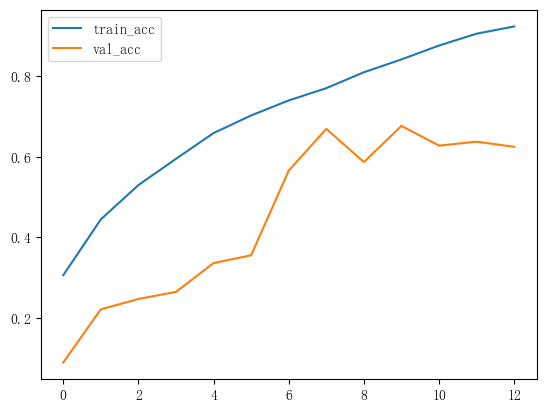

In [6]:
tf.config.run_functions_eagerly(True)
history=Resnet19.fit(train_dataset,epochs=50,
                         validation_data=validation_dataset,
                         shuffle=True,callbacks=[model_checkpoint,early_stopping])
train_acc=history.history['accuracy']
vali_acc=history.history['val_accuracy']
plt.plot(train_acc,label="train_acc")
plt.plot(vali_acc,label="val_acc")
plt.legend()
plt.show()